# Titanic Data Survival Prediction: K-Nearest Neighbours (KNN) Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To predict the number of survivors from the titanic dataset.

### b) Defining the Metric for Success

To be able to use K-NN Classifier to predict who died and who survived from the titanic dataset, with the right accuracy.

### c) Understanding the context 

The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 out of 2,240  passengers and crew.


The dataset has several relevant columns that will help us make the above predictions. 

The columns are explained below.

PassengerId: unique ID of the passenger

Survived: 0 = No, 1 = Yes

Pclass: passenger class 1 = 1st, 2 = 2nd, 3 = 3rd

Name: name of the passenger

Sex: passenger’s sex

Age: passenger’s age

SibSp: number of siblings or spouses on the ship

Parch: number of parents or children on the ship

Ticket: Ticket ID

Fare: the amount paid for the ticket

Cabin: cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### d) Recording the Experimental Design

Defining the Question

Reading the Data

Data Exploration and Cleaning

Perform K-NN Classification using different test2 and train1 sizez

Evaluation of the solution

Challenging the solution

Conclusion

### e) Data Relevance

The dataset provided are relevant as they are from a trusted website

https://archive.org/download/train15_202002/train1%20%285%29.csv


https://archive.org/download/test21_202002/test2%20%281%29.csv


## 2. Reading the Data

### Importing libraries

In [42]:
import numpy as np
import pandas as pd
import heapq
import seaborn as sns
from sklearn import metrics
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import datasets 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [43]:
# Loading the Data from the source i.e. csv
# ---
# train1 Dataset source = https://archive.org/download/train5_202002/train%20%285%29.csv
#  test2 Dataset source = https://archive.org/download/test1_202002/test%20%281%29.csv
#

train1 = pd.read_csv("https://archive.org/download/train5_202002/train%20%285%29.csv")



In [201]:
# Loading the second dataset

test2 = pd.read_csv("https://archive.org/download/test1_202002/test%20%281%29.csv")



## 3. Checking the Data

### test2 Dataset

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# previewing the head of the test2 dataset
test2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# previewing the tail of the test2 dataset
test2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# checking columns
test2.columns.to_list()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
# Determining the no. of records in our dataset
test2.shape

# the train1 dataset has 418 rows and 11  columns

(418, 11)

In [ ]:
# Checking whether each column has an appropriate datatype

test2.info()

# not all columns have the right data types
# age will be converted into an integer
# Some categorical data like survived and pclass are encoded while some (sex) are not
# we will label encode the sex column before we begin our analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# doing a value count check for categorical data
# are most likely to be in 1st class
test2['Pclass'].value_counts()

# there are two outomes
# 1 = 491 passengers were in 1st class
# 2 = 216 passengers were in 2nd class
# 3 = 184 passengers were in 3rd class

3    218
1    107
2     93
Name: Pclass, dtype: int64

Classifying Embarked

In [ ]:
# doing a value count check for categorical data
# we classify by embarked column and predict  
# what port most passangers would embark on


test2['Embarked'].value_counts()

# S = 270, C = 102, Q = 46

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
# checking for null values
test2.isnull().sum()

# cabin has 327 null values, age has 86 null values 
# fare has 1 missing values
# we will fill the age null values with average ages for each pclass and
# we will drop the cabin column
# we will fill the 1 null values in the embarked column with the mean 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# checking for duplicates
test2.duplicated().sum()

# there are no duplicates in this dataset

0

In [ ]:
# missing values in the age column
#we will replace the age according with the class

# 1st class
class1 = test2[test2['Pclass']==1]

In [ ]:
#computing the mean age in 1st class
class1['Age'].mean()

40.91836734693877

In [ ]:
# 2nd class
class2 = test2[test2['Pclass']==2]


In [ ]:
#computing the mean age in 2nd class
class2['Age'].mean()

28.7775

In [ ]:
# 3rd class
class3 = test2[test2['Pclass']==3]

In [ ]:
#computing the mean age in 3rd class
class3['Age'].mean()

24.02794520547945

In [ ]:
# we will use a function to fill in null values in the age column with the mean of the age in that pclass
# this is because there could be a certain age distribution for each pclass
# the function will check the Pclass 
# and assign an age value depending on the average age of passengers in that class
#
def assign_age(cols):
    Age = cols[0]
    Pclass = cols[-1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 40.91836734693877
        elif Pclass == 2:
            return 28.7775
        else:
            return 24.02794520547945
    else:
        return Age

test2['Age'] = test2[['Age']].apply(assign_age, axis=1)

In [ ]:
# converting the age data type from float to integer
test2['Age'] = test2['Age'].astype(int)

In [ ]:
# dropping the missing record in the fare column
test2['Fare'] = test2['Fare'].fillna(test2['Fare'].mean(), axis = 0)

In [ ]:
# checking for null values
test2.isnull().sum()

# all missing values have been handled

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# previewing the changes
test2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [ ]:
# dealing with missing data

#dropping cabin column 
test2= test2.drop('Cabin',axis=1)

In [ ]:
# dealing with missing data

# filling Embarked columns with mode  
test2['Embarked'] = test2['Embarked'].fillna(test2['Embarked'].mode()[0])


In [ ]:
# checking after handling missing values
test2.isnull().sum()

# All the missing values have been handled

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Dropping unneccesary columns
test3 = test2.drop(['PassengerId','Name', 'Ticket',], axis = 1) 


In [ ]:
# previewing after the drop

test3.head()

# before modelling, we will perform label encoding to sex and embarked columns 
# and standardize the fare column

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


#### Label Encoding Test dataset

In [ ]:
# creating a copy of the datset to label encode

test3co = test3.copy()

In [ ]:
# previewing
test3co.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


In [ ]:
# label encoding the Embarked column
test3co['Sex'] = LabelEncoder().fit_transform(test3co['Sex'].values)

# previewing
test3co.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,Q
1,3,0,47,1,0,7.0000,S
2,2,1,62,0,0,9.6875,Q
3,3,1,27,0,0,8.6625,S
4,3,0,22,1,1,12.2875,S


In [ ]:
# decoding

print(test3['Sex'].value_counts())
print("____________________________")
print(test3co['Sex'].value_counts())

# 0 = females (152)
# 1 = males (266)

male      266
female    152
Name: Sex, dtype: int64
____________________________
1    266
0    152
Name: Sex, dtype: int64


0= female = 152


1= male = 266

In [ ]:
# checking the distribution of Embarked.
# this will be our response variable, we will classify by this variable

print(test3['Embarked'].value_counts())
print("____________________________")
print(test3co['Embarked'].value_counts())

# Ports of embarkation
# 0 = C (Cherbourg) = 102 passangers
# 1 = Q (Queenstown) = 46 passangers
# 2 = S (Southampton) = 270 passangers

S    270
C    102
Q     46
Name: Embarked, dtype: int64
____________________________
S    270
C    102
Q     46
Name: Embarked, dtype: int64


0 = C (Cherbourg) = 102 passangers

1 = Q (Queenstown) = 46 passangers

2 = S (Southampton) = 270 passangers

#### Splitting our dataset

In [ ]:
# checking columns

test3co.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
# splitting into categorical and numerical variables

X = test3co.drop(['Embarked'],axis = 1)
y = test3co['Embarked']

#####Standard scaling

In [ ]:
# #scaling the X values
# scaler = StandardScaler()

# # transform data
# X = scaler.fit_transform(X)

In [ ]:
# standardizing the X values

X = StandardScaler().fit_transform(X)


In [ ]:
# Using the 80-20 to train and test the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)

(334, 6) (334,)


Creating a base model with a 80-20 split

In [ ]:
#fitting the model  
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#making prediction using the fitted model
y_pred = KNN.predict(X_test)

In [ ]:
#assessing the accuracy and performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.7023809523809523
confusion_matrix of model: [[ 7  0 15]
 [ 0  6  1]
 [ 8  1 46]]


Our base model has a slightly low performance, if we were to model onthis dataset we could have tried different proportions. 

However, we are not going to in this case.

### train1 dataset

In [45]:
# Previewing the top of our dataset
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# Previewing the bottom of our dataset
train1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [47]:
# checking columns
train1.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [48]:
# Determining the no. of records in our dataset
train1.shape

# the train1 dataset has 891 rows and 12 columns

(891, 12)

In [49]:
# Checking whether each column has an appropriate datatype

train1.info()

# not all columns have the right data types
# age will be converted into an integer
# Some categorical data like survived and pclass are encoded while some (sex) are not
# we will label encode the sex column before we begin our analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
# doing a value count check for categorical data
# sex column
train1['Survived'].value_counts()

# there are two outomes
# 0 = indicates passengers who did not survive (549)
# 1 = indicates passengers who survived (342)

0    549
1    342
Name: Survived, dtype: int64

In [51]:
# doing a value count check for categorical data
# pclass column
train1['Pclass'].value_counts()

# 3rd class had the highest number of passangers (491) 
# then the second class (216)
# and lastly, 1st class had the lowest number of passangers (184) 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [52]:
# doing a value count check for categorical data
# sex column
train1['Sex'].value_counts()

# there were 577 males and 314 females

male      577
female    314
Name: Sex, dtype: int64

In [53]:
# checking for null values
train1.isnull().sum()

# cabin has 687 null values, age has 177 null values 
# and the embarked column has 2 missing values
# we will fill the age null values with average ages for each pclass and
# we will drop the cabin column
# we will fill the 2 null values in the embarked column with the mode 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
# checking for duplicates
train1.duplicated().sum()

# there are no duplicates in this dataset

0

In [55]:
# checking the entries for survived column which is our target column
train1['Survived'].value_counts()

# there were 549 - non survivors and 342 - survivors

0    549
1    342
Name: Survived, dtype: int64

In [56]:
train1["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## 5. Tidying the Dataset

####train1 Dataset Cleaning

In [57]:
# we will fill the age null values with average ages for each pclass and
# we will drop the cabin column
# we will fill the 2 null values in the embarked column with the mode 

## Dealing with missing data

### Handling Missing values in the Age column 

Finding class age means

In [58]:
# missing values in the age column
#we will replace the age according with the class

# 1st class
class1 = train1[train1['Pclass']==1]

In [59]:
#computing the mean age in 1st class
class1['Age'].mean()

38.233440860215055

In [60]:
# 2nd class
class2 = train1[train1['Pclass']==2]


In [61]:
#computing the mean age in 2nd class
class2['Age'].mean()

29.87763005780347

In [62]:
# 3rd class
class3 = train1[train1['Pclass']==3]

In [63]:
#computing the mean age in 3rd class
class3['Age'].mean()

25.14061971830986

In [64]:
# we will use a function to fill in null values in the age column with the mean of the age in that pclass
# this is because there could be a certain age distribution for each pclass
# the function will check the Pclass 
# and assign an age value depending on the average age of passengers in that class
#
def assign_age(cols):
    Age = cols[0]
    Pclass = cols[-1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

train1['Age'] = train1[['Age']].apply(assign_age, axis=1)

In [65]:
# converting the age data type from float to integer
train1['Age'] = train1['Age'].astype(int)

In [66]:
# previewing the changes
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [67]:
# dealing with missing data

#dropping cabin column 
train1= train1.drop('Cabin',axis=1)

In [68]:
# dealing with missing data

# filling Embarked columns with mode  
train1['Embarked'] = train1['Embarked'].fillna(train1['Embarked'].mode()[0])


In [69]:
# checking after handling missing values
train1.isnull().sum()

# All the missing values have been handled

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [70]:
# Dropping unneccesary columns
train2 = train1.drop(['PassengerId','Name', 'Ticket',], axis = 1) 


In [71]:
# previewing after the drop

train2.head()

# before modelling, we will perform label encoding to sex and embarked columns 
# and standardize the fare column

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


Anomalies

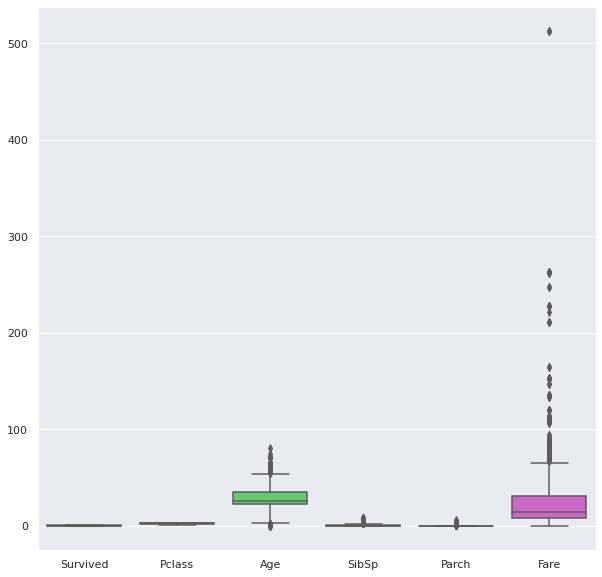

In [72]:
# plotting boxplots to check for anomalies

sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(data = train2, palette = 'hls')

# there are outliers in all columns except survived and pclass
# we will not  remove any outliers apart from those in the age column 
# this is to avoid lossing too much data

In [122]:
# Checking for Anomalies in Fare column
#
Q1= train2['Fare'].quantile(0.07)
Q2 =train2['Fare'].quantile(0.50)
Q3 =train2['Fare'].quantile(0.93)
IQR = Q3-Q1

# showing the quartile ranges
display('lower quartile')
print(Q1)
print('__________________________________________')
display('medium quartile')
print(Q2)
print('___________________________________________')
display('upper quartile')
print(Q3)
print('___________________________________________')
print(IQR)

'lower quartile'

7.2292
__________________________________________


'medium quartile'

14.4542
___________________________________________


'upper quartile'

88.32294000000012
___________________________________________
81.09374000000011


In [123]:
# Removing outliers
train3 = train2[train2['Fare'] <= 81.09374000000011]# , train2['Age'] <=]

# we will remove outliers on the upper quartile

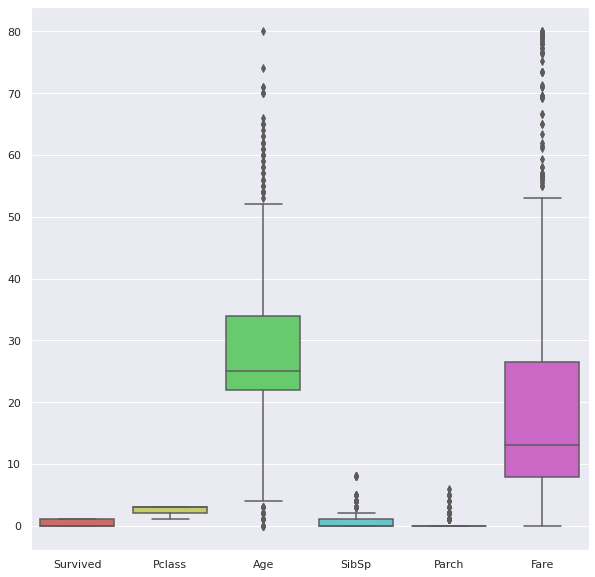

In [124]:
# plotting boxplots to check if we have removed the outliers

sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(data = train3, palette = 'hls')

We will not remove too many records as this would interfere with our data analysis.

In [119]:
# Checking for Anomalies in Fare column
#
Q1= train2['Age'].quantile(0.03)
Q2 =train2['Age'].quantile(0.50)
Q3 =train2['Age'].quantile(0.97)
IQR = Q3-Q1

# showing the quartile ranges
display('lower quartile')
print(Q1)
print('__________________________________________')
display('medium quartile')
print(Q2)
print('___________________________________________')
display('upper quartile')
print(Q3)
print('___________________________________________')
print(IQR)

'lower quartile'

3.0
__________________________________________


'medium quartile'

25.0
___________________________________________


'upper quartile'

59.0
___________________________________________
56.0


In [120]:
# Removing outliers
train3 = train2[train2['Age'] <= 56.0]# , train2['Age'] <=]

# we will remove outliers on the upper quartile

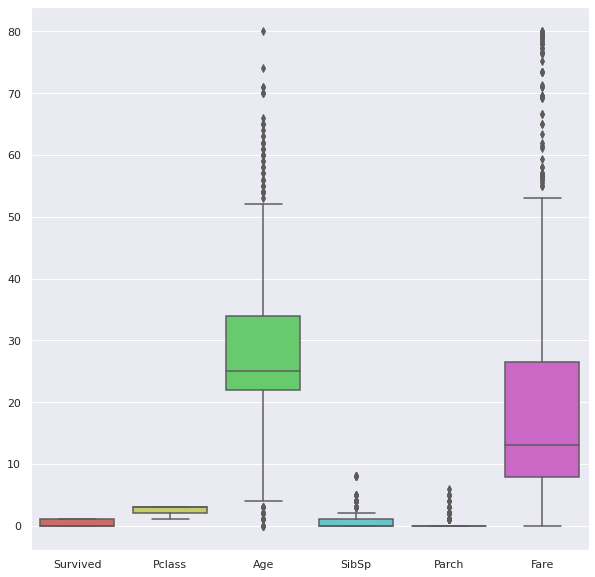

In [125]:
# plotting boxplots to check if we have removed the outliers

sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(data = train3, palette = 'hls')

In [131]:
# checking the number of records lost

print(train2.shape)
print(train3.shape)

891-817

# we lost only 74 rows while removing outliers

(891, 8)
(817, 8)


#### Label Encoding Test dataset

In [160]:
# creating a copy of the datset to label encode

train3copy = train3.copy()

In [161]:
# previewing
train3copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [162]:
# label encoding some columns of 
# the test dataset before splitting the dataset
le = LabelEncoder()

# Assigning numerical values and storing in another column
train3copy['Sex'] = le.fit_transform(train3copy['Sex'].values)

#  previewing
train3copy.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [163]:
# decoding

print(train3['Sex'].value_counts())
print("____________________________")
print(train3copy['Sex'].value_counts())

# 0= female = 266
# 1= male = 551

male      551
female    266
Name: Sex, dtype: int64
____________________________
1    551
0    266
Name: Sex, dtype: int64


In [164]:
# label encoding the Embarked column
train3copy['Embarked'] = LabelEncoder().fit_transform(train3copy['Embarked'].values)

# previewing
train3copy.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [165]:
# Decoding
print(train3['Embarked'].value_counts())
print("____________________________")
print(train3copy['Embarked'].value_counts())

# Ports of embarkation
# 0 = C (Cherbourg) = 130 passangers
# 1 = Q (Queenstown) = 75 passangers
# 2 = S (Southampton) = 612 passangers

S    612
C    130
Q     75
Name: Embarked, dtype: int64
____________________________
2    612
0    130
1     75
Name: Embarked, dtype: int64


## 6. Exploratory Analysis

##Train dataset analysis 

In [134]:
# previewing our dataset
train3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [166]:
# previewing label encoded dataset
train3copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


### Univariate Analysis

In [90]:
import pandas_profiling as pp
import matplotlib.pyplot as plt
import matplotlib.pylab as plt

In [135]:
# using the uncoded dataset for analysis 
# plotting summary statistics
train3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,0.348837,2.427173,28.485924,0.509180,0.352509,20.748735
std,0.476894,0.770088,13.084945,1.127954,0.789388,18.276758
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,25.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,6.000000,80.000000


In [136]:
# comparing the number of passangers that survived to those that did not
train3['Survived'].value_counts()

# 532 passangers  did not survive 
# 285 passangers survived

0    532
1    285
Name: Survived, dtype: int64

0    532
1    285
Name: Survived, dtype: int64


([<matplotlib.patches.Wedge at 0x7f0b3408de90>,
 [Text(-1.047396926068878, 0.3360947474470039, 'Did Not Survive'),
  Text(1.047396926068878, -0.336094747447004, 'Survived')])

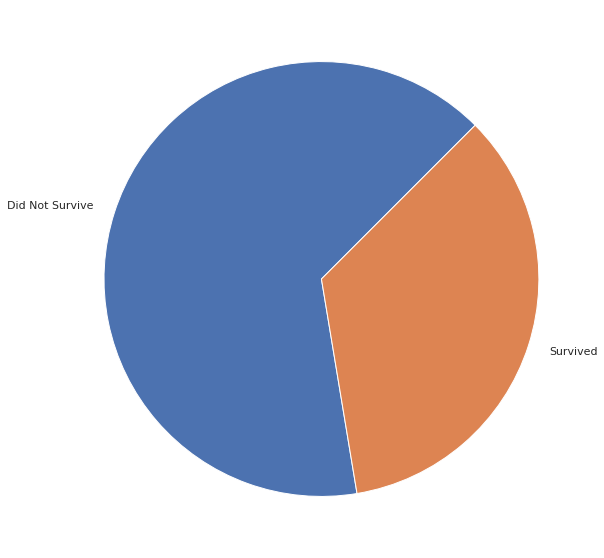

In [137]:
# visualizing this distribution
survival = train3['Survived'].value_counts()
print(survival)

#visualising the count who survived and not using pie chart
labels = ('Did Not Survive','Survived')
plt.pie(survival,labels = labels,startangle=45)

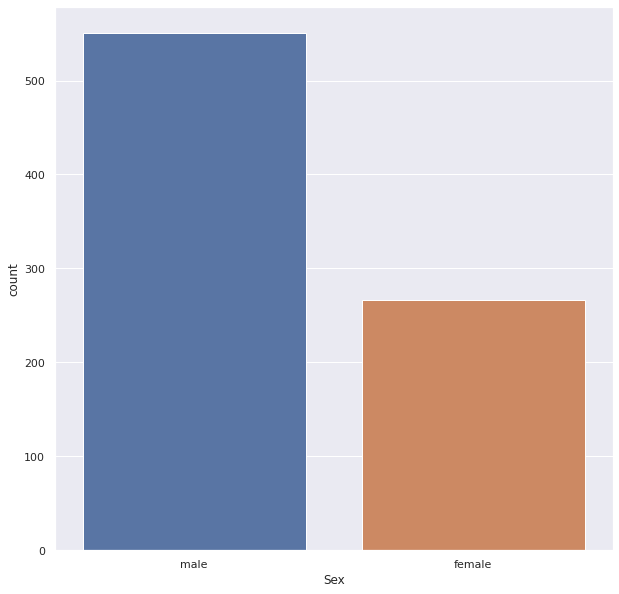

In [138]:
#Visulizing the distribution of gender
sns.countplot(x='Sex', data=train3)

#There were more males that females in the titanic 

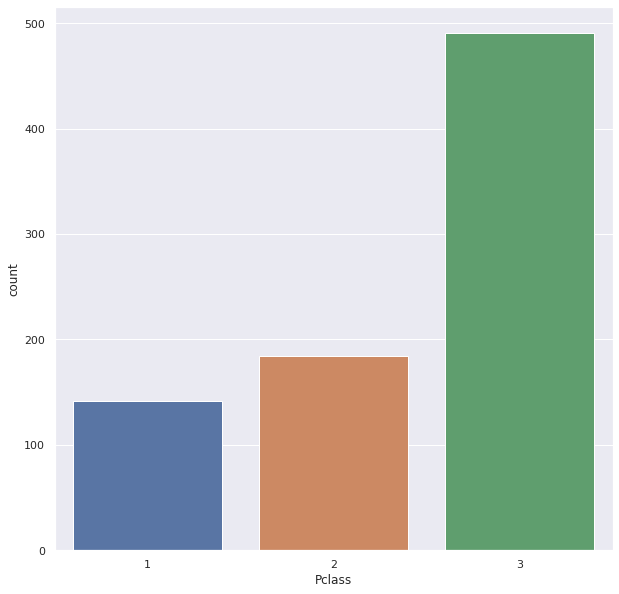

In [139]:
#Visulizing the distribution of passanger classes
sns.countplot(x='Pclass', data=train3)

#There were more passangers in the third class, followed by 2nd class
# first class had the least passangers

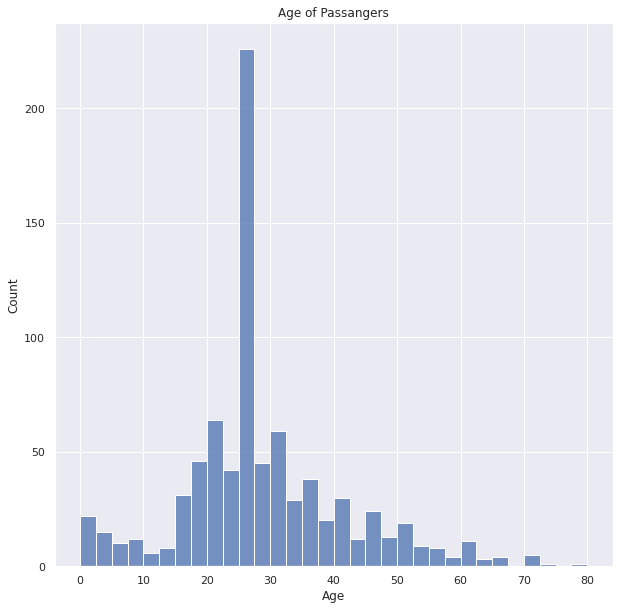

In [140]:
# showing the distribution of age of respondents

sns.histplot(x = 'Age',data = train3)
plt.title('Age of Passangers')
plt.show()

Bivariate Analysis

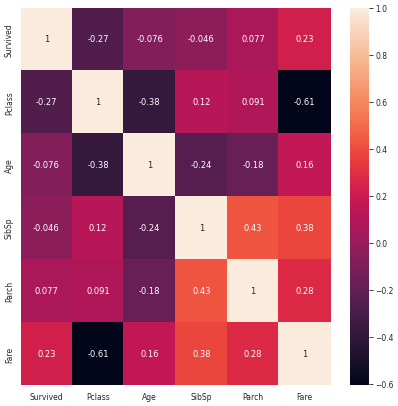

In [143]:
# Ploting the bivariate summaries and recording our observations
# plotting correlation heatmap
# fig size
plt.figure(dpi = 50)

# plotting a correlation heatmap
sns.heatmap(train3.corr(),annot=True)

# showing
plt.show()

# pclass is negatively highly correlated to fare.
# the correlation coefficient is -0.61
# the least correlated variables are survived and sibsp

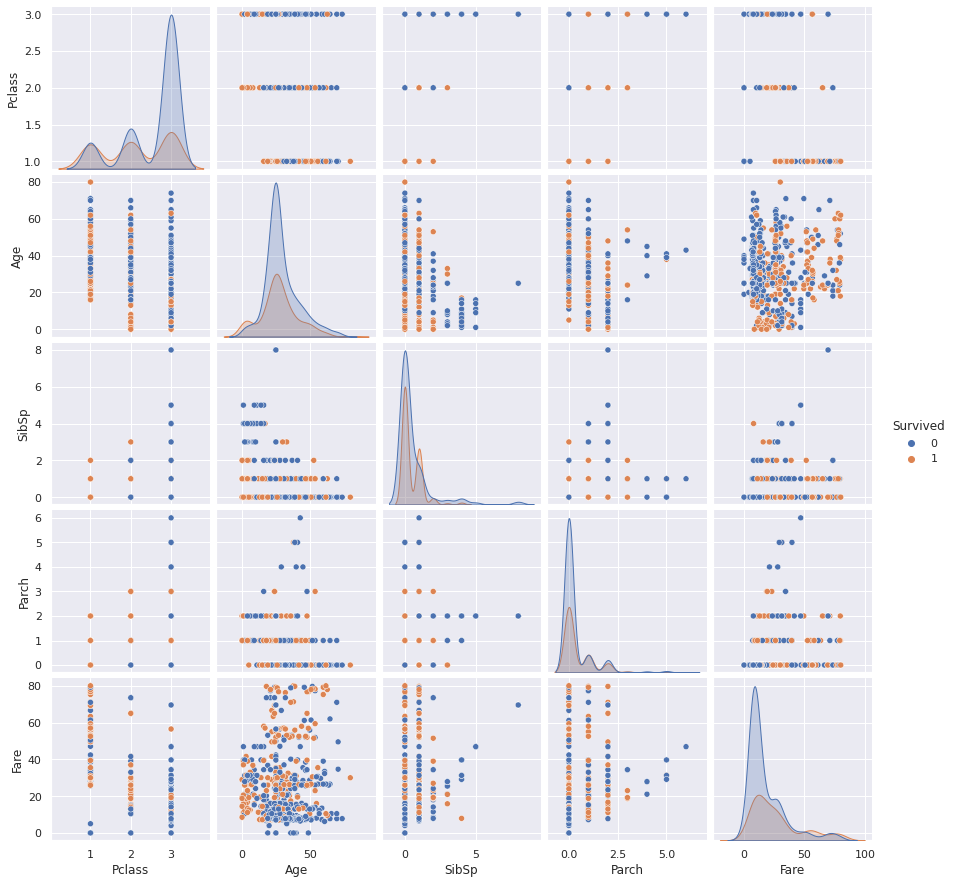

In [157]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(train3, hue = 'Survived')
plt.show()

Text(0.5, 1.0, 'survival distribution with sex')

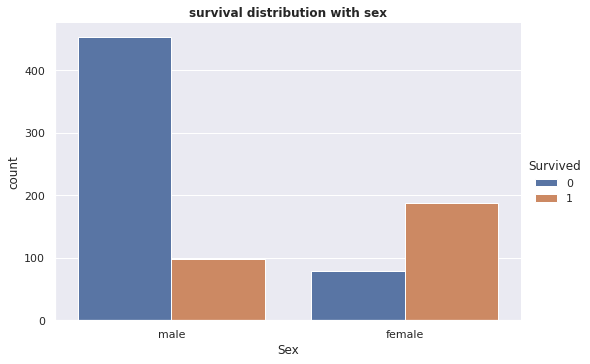

In [146]:
#comparing the distribution of the survival of male and female
sns.catplot(x='Sex',hue='Survived',data=train3,kind='count',aspect=1.5)
plt.title('survival distribution with sex',weight='bold')

Text(0.5, 1.0, 'pclass against survived')

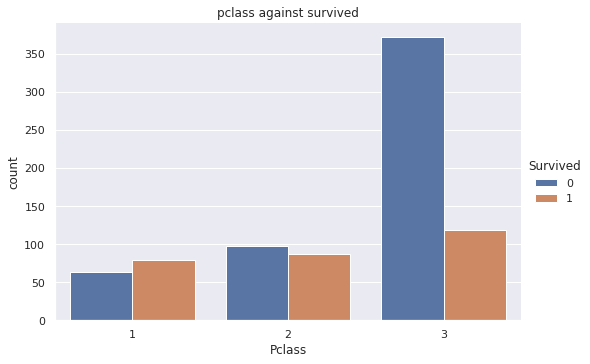

In [153]:
#comparing the pclass against survived
sns.catplot(x='Pclass',hue='Survived',data=train3,kind='count',aspect=1.5)
plt.title('pclass against survived')#,weight='bold'

# 0= did not survive
# 1 = survived
# most passangers in the 3rd class did not survive compared to other classes
# 1st class had the least number of passangers that did not survive
# the distribution of those who survived is somehow uniform across all passanger classes

## 7. Implementing the Solution

### Modelling

In [167]:
# we will use the encoded dataset
# previewing
train3copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [174]:
train3copy.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [185]:
# spliting data into label and features
# 
X = train3copy.drop(['Survived'],axis = 1)
y = train3copy['Survived']

In [186]:
#scaling the X values
scaler = StandardScaler()

# transform data
X = scaler.fit_transform(X)

In [175]:
# converting to a dataframe
#X = pd.DataFrame(X, columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

#### Splitting our dataset into different proportions

1.Model 1: 80 - 20

In [188]:
# Using the 80-20 to train and test the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)

(653, 7) (653,)


In [189]:
#fitting the model  
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [190]:
#making prediction using the fitted model
y_pred = KNN.predict(X_test)

In [191]:
#assessing the accuracy and performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.8109756097560976
confusion_matrix of model: [[79 20]
 [11 54]]


The model has an accuracy of 81.09%. This is a good model. 

We will check other test sizes to see which one works best.


1.Model 2: 70 - 30

In [192]:
# Using the 70-30 to train and test the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)

(571, 7) (571,)


In [193]:
#fitting the model  
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [194]:
#making prediction using the fitted model
y_pred = KNN.predict(X_test)

In [195]:
#assessing the accuracy and performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.7886178861788617
confusion_matrix of model: [[125  28]
 [ 24  69]]


The model has an accuracy of 78%. 

The accuracy has gone lower than in model 1.

Model 1 is still our best fit at this stage.


1.Model 3: 60 - 40

In [196]:
# Using the 80-20 to train and test the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)

(490, 7) (490,)


In [197]:
#fitting the model  
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [198]:
#making prediction using the fitted model
y_pred = KNN.predict(X_test)

In [199]:
#assessing the accuracy and performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.8195718654434251
confusion_matrix of model: [[175  26]
 [ 33  93]]


Model 3 (60-40) is our best model so far with an accuracy of 81.95%. 

This is our best model in this analysis. 

We will perform hyperparameter tuning on it to see if its performance will improve, though it is still okay at this point.

## 8. Challenging the solution

Different model proportions gave us different model performances. 

However, Model 3, which was a 60-40 split gave us the best model. 

We could do more split proportions and hyperparameter tuning to explore on different model performances.

In this case however, we will not do this since our model has an optimal accuracy.

## 9. Follow up questions

### a). Did we have the right data?

Yes,we have been able to build an optimal performing model.

### b). Do we need other data to answer our question?

No. Our model is of a good accuracy.

### c). Did we have the right question?

Yes